In [1]:
# Import the random module.
import random
import numpy as np

In [2]:
random.randint(-90,90)

14

In [3]:
random.random()

0.025161326233286374

In [4]:
random_number = random.randint(-90,89) + random.random()
random_number

-56.17540164216825

In [5]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [6]:
latitudes


[68.73023293571005,
 -70.69842916038704,
 83.74104117861957,
 -37.44081019009243,
 7.752065155380606,
 13.467003682222614,
 33.45356728727763,
 -80.69713160861524,
 12.700291514858877,
 57.997282448010694]

The randrange() Function
The randrange() function behaves differently than the previous two functions. Inside the parentheses, we need to add two numbers, a lower and upper limit, separated by a comma.

For the randrange() function, there is an option to add a step parameter and set it equal to an integer, which will generate increments of a given integer value, from the lower to the upper limit.

For example, add random.randrange(-90, 90, step=1) to a new cell and run the cell. The output is a number between -90 and 90, where the step is the difference between each number in the sequence.
This function might help us by combining the random.randrange() and random.random() functions to generate a floating-point decimal between –90 and 90, like we did with the random.randint() and random.random() functions.


In [7]:
random.randrange(-90,90,step = 3)

-6

In [8]:
random.uniform(-90,90)

8.072936389989394

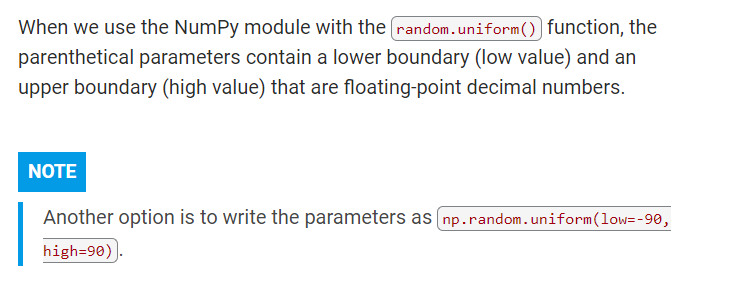

In [9]:
np.random.uniform(-90.000,90.000)

21.461698916412757

To generate more than one floating-point decimal number between –90 and 90, we can add the size parameter when we use the NumPy module and set that equal to any whole number.

In [10]:
np.random.uniform(-90.000, 90.000, size=1500)

array([ 74.66363251, -52.8097493 ,  71.97827455, ..., -45.16823417,
       -78.63964218,  49.06439338])

In [11]:
# Import timeit.
import timeit

In [12]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12.3 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.6 ms ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
def latitudes(size):
    latitudes = []
    x = 0
    for i in range(1500):
            random_lat = random.randint(-90, 90) + random.random()
            latitudes.append(random_lat)
            x += 1
    return latitudes


In [37]:
# Call the function with 1500.
%timeit latitudes(1500)

1.6 ms ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
